In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df = pd.read_csv('adult.csv')
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [7]:
# Summary statistics of the dataset
print(df.describe())

                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


In [8]:
# Information about the columns, data types, and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [9]:
# Check for missing values in the dataset
print("Missing values:")
print(df.isnull().sum())

Missing values:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [10]:
# Check unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
for column in categorical_columns:
    print(f"Unique values in {column}: {df[column].unique()}")


Unique values in workclass: ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Unique values in education: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
Unique values in marital-status: ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
Unique values in occupation: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
Unique values in relationship: ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
Unique values in race: ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
Unique values in gender: ['Male' 'Fem

In [11]:
data=df.copy()

In [12]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

# Encode each categorical column and add the encoded columns to the DataFrame
for column in categorical_columns:
    # Encode the current categorical column and add the encoded column to the DataFrame
    data[column] = label_encoder.fit_transform(data[column])



In [13]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
48838,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
48839,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
48840,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [14]:
# Handling missing values (if any)
data.replace('?', pd.NA, inplace=True)

In [15]:
# Dropping rows with missing values
data.dropna(inplace=True)

In [16]:
# Selecting features and target variable
# Assuming 'income' is the target variable
target = data['income']
features = data.drop('income', axis=1)


In [17]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [18]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [19]:
# Feature scaling (using StandardScaler for numerical features)
scaler = StandardScaler()
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


In [20]:
from sklearn.decomposition import PCA

# Dimensionality reduction using PCA (optional step)
# Reduce the number of features using PCA
pca = PCA(n_components=10)  # Set the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [21]:
from sklearn.pipeline import Pipeline

preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10))
])

X_train_pipeline = preprocessing_pipeline.fit_transform(X_train)
X_test_pipeline = preprocessing_pipeline.transform(X_test)

In [22]:
# Print preprocessed training data
print("Preprocessed Training Data:")
print(X_train.head())  # Displaying the first few rows of preprocessed training data


Preprocessed Training Data:
            age  workclass    fnlwgt  education  educational-num  \
37193  0.246123          4 -0.421839         15        -0.029836   
31093  0.974794          6 -0.138604          0        -1.585248   
33814 -0.336813          2 -0.161041         11        -0.418689   
14500 -0.774016          4 -0.605742         11        -0.418689   
23399  0.537592          4 -1.529544          8         0.359017   

       marital-status  occupation  relationship  race  gender  capital-gain  \
37193               2           7             0     4       1     -0.144456   
31093               2           3             0     4       1     -0.144456   
33814               2           3             0     4       1     -0.144456   
14500               4           1             1     4       0     -0.144456   
23399               4          14             1     4       1     -0.144456   

       capital-loss  hours-per-week  native-country  
37193     -0.219726       -0.03437

In [23]:
# Print preprocessed testing data
print("\nPreprocessed Testing Data:")
print(X_test.head()) 


Preprocessed Testing Data:
            age  workclass    fnlwgt  education  educational-num  \
7762   1.266263          4 -1.484991         11        -0.418689   
23881 -0.992617          4 -0.728546         11        -0.418689   
30507  0.318991          4 -0.181335          9         1.136723   
28911 -0.482548          4 -0.027042         11        -0.418689   
19484  0.027522          4  0.837237          9         1.136723   

       marital-status  occupation  relationship  race  gender  capital-gain  \
7762                0           8             4     4       0     -0.144456   
23881               2          14             3     3       1     -0.144456   
30507               0          10             1     4       0      1.785937   
28911               2          14             0     4       1     -0.144456   
19484               2          12             5     4       0     -0.144456   

       capital-loss  hours-per-week  native-country  
7762      -0.219726       -0.03437

In [24]:
# If you used PCA for dimensionality reduction, print the transformed data
print("\nPCA Transformed Training Data:")
print(X_train_pca[:5])


PCA Transformed Training Data:
[[-2.43128993  0.13174429 -4.62552555 -1.3323888  -0.48844499  0.01644532
  -0.6434611  -0.01247882 -0.61113722  0.0124362 ]
 [-1.8411153  -2.38776327 10.67557866 -2.37154069  0.93329444 -1.89287953
  -0.69404981  0.03502029 -0.68679529  0.74237885]
 [-2.31382384 -3.69602884 -0.26307405 -1.13696844 -1.34452903  1.21769631
  -0.53540006 -0.25959631 -0.13602884 -0.4781535 ]
 [-2.32532413 -5.5356998  -0.0985867   0.38588018 -0.7503572  -1.46804654
  -0.15101236  0.12205731 -0.44500869 -0.57791362]
 [-2.05620796  7.63236333  1.72836882  0.3672506  -1.24921802 -0.28905064
   0.75634485  0.8376827  -1.19377684 -0.78222454]]


In [25]:
# If you used a preprocessing pipeline, print the transformed data
print("\nPreprocessed Training Data using Pipeline:")
print(X_train_pipeline[:5])  # Displaying the transformed training data using the pipeline

print("\nPreprocessed Testing Data using Pipeline:")
print(X_test_pipeline[:5])   # Displaying the transformed testing data using the pipeline


Preprocessed Training Data using Pipeline:
[[ 1.17812807  0.31199792  0.48069488 -0.39767249  0.23465621  0.06304935
  -0.61020267 -0.4930603  -0.52376765 -0.0489334 ]
 [ 0.62113586 -3.09356625 -0.10641125 -0.84518919 -1.27865541  0.23581621
   0.31640035  0.26471974  0.15553231 -0.02913063]
 [ 0.34453453 -0.7440327   1.35101021 -0.2998509   0.96665973  0.24623789
  -0.49024131 -0.16728817  0.11898494  0.09124045]
 [-1.26313461  0.26213106  0.59896434 -0.65146185  0.14429778  0.17134934
  -0.60970605  0.1725108   0.52367944  0.67043876]
 [ 1.03651633 -0.00495707 -0.91430415 -0.82422657 -0.85215462 -0.13131016
  -1.44397363  0.73574017 -0.13372587 -0.34015456]]

Preprocessed Testing Data using Pipeline:
[[-0.46157037  0.66357999  1.02860219 -0.1073521  -2.92992767 -0.24837816
   0.32504941 -0.73273164  0.32535615  0.36621714]
 [-0.2292185   0.31315466 -1.34946158 -0.24834144 -0.51798651 -0.13529363
  -0.74356246 -0.21103947  0.43148003 -0.78584469]
 [ 0.82430295  1.20423975  0.29159479

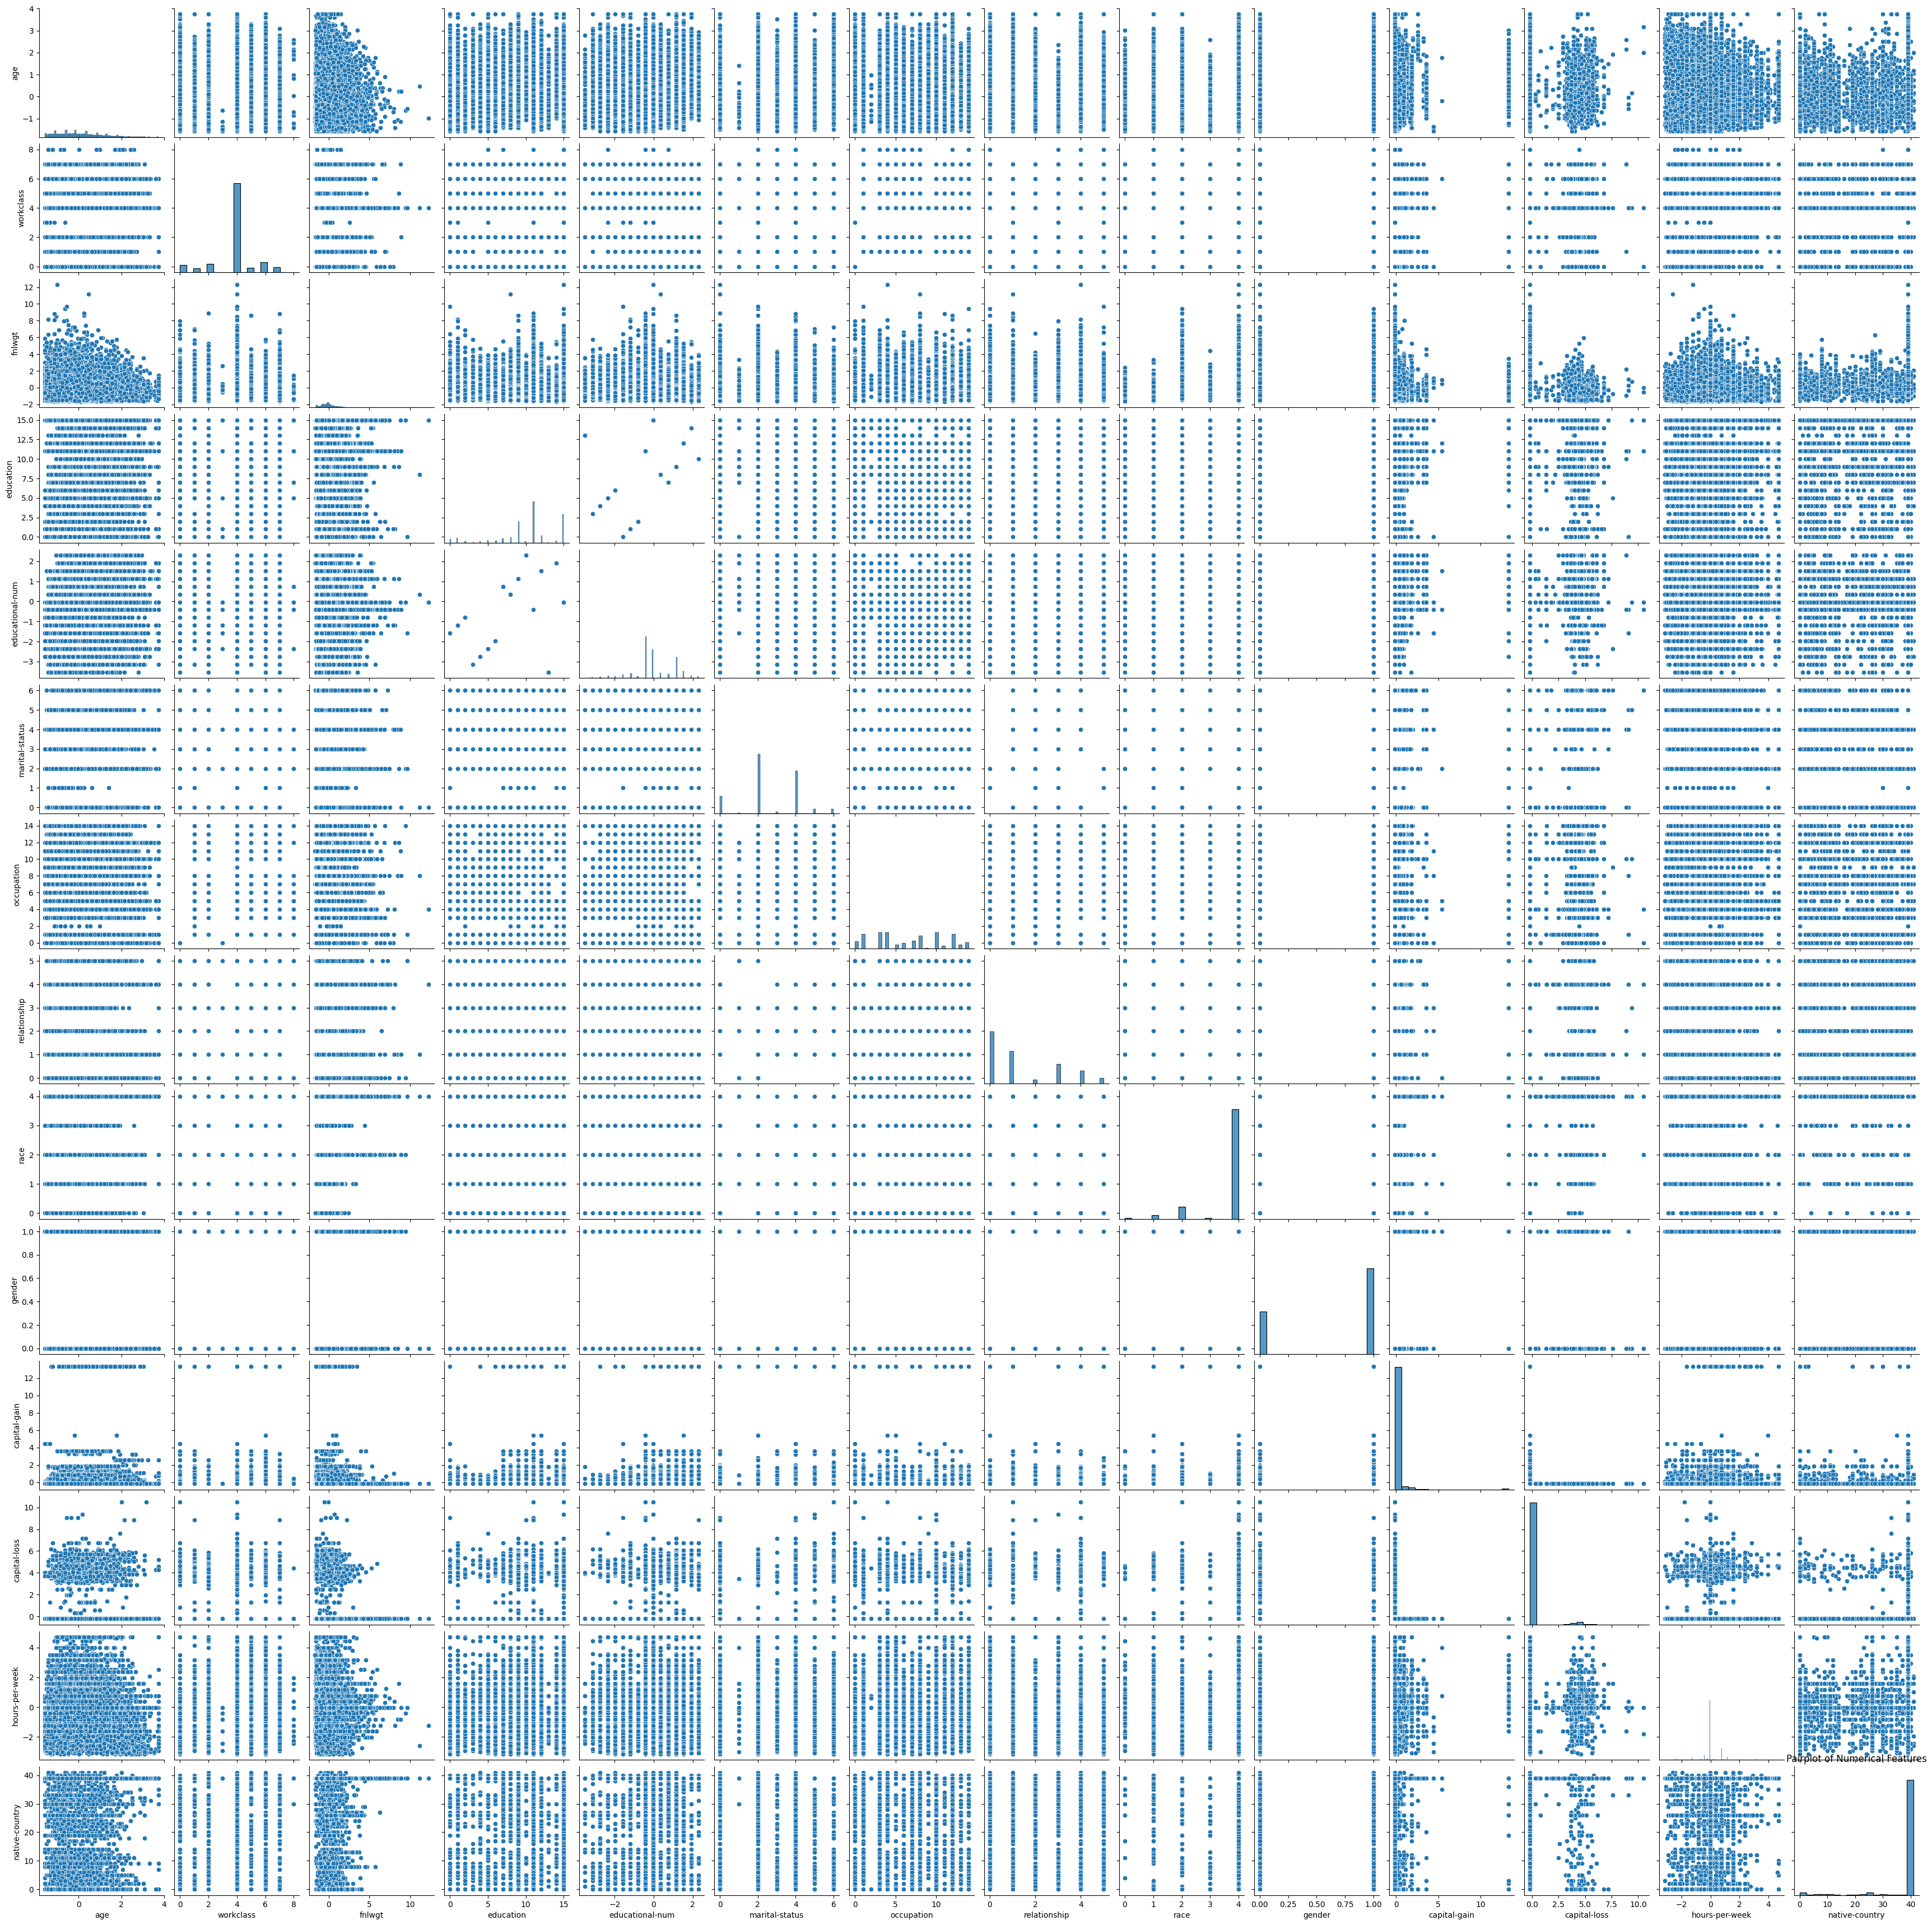

In [26]:
# Pairplot for visualizing relationships between numerical features
sns.pairplot(X_train)
plt.title('Pairplot of Numerical Features')
plt.show()

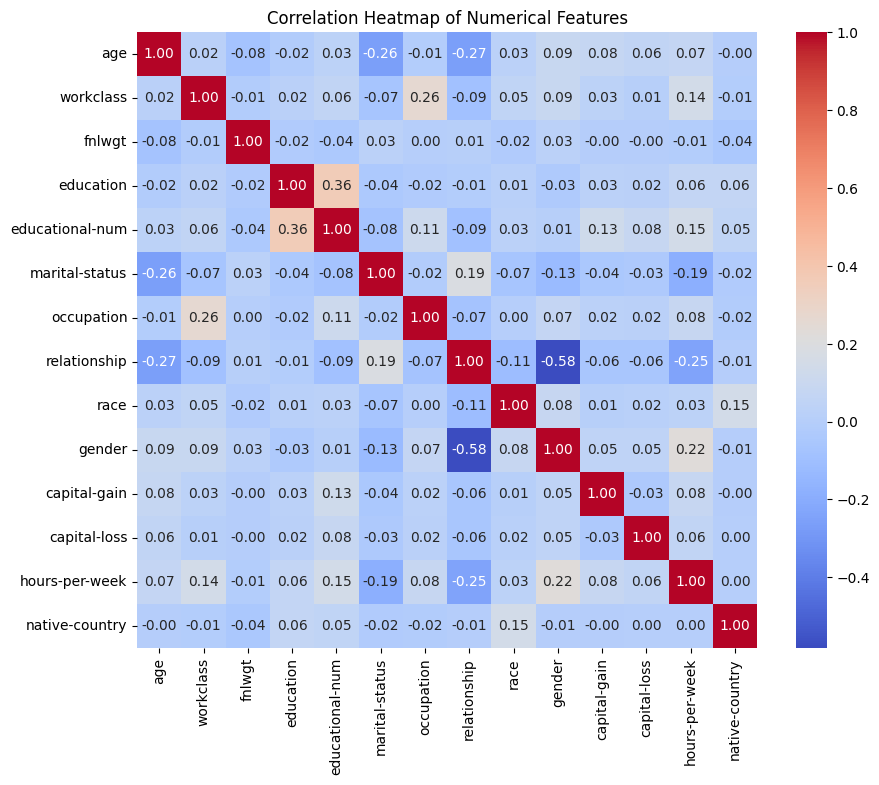

In [27]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

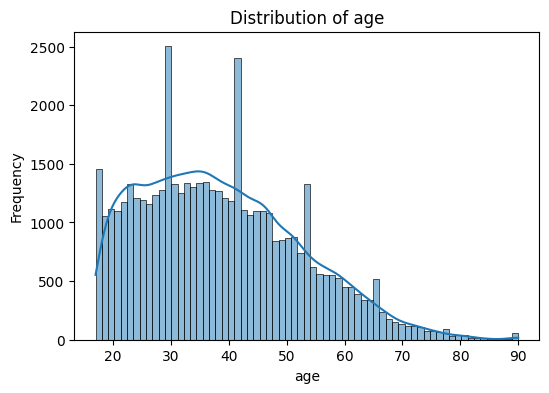

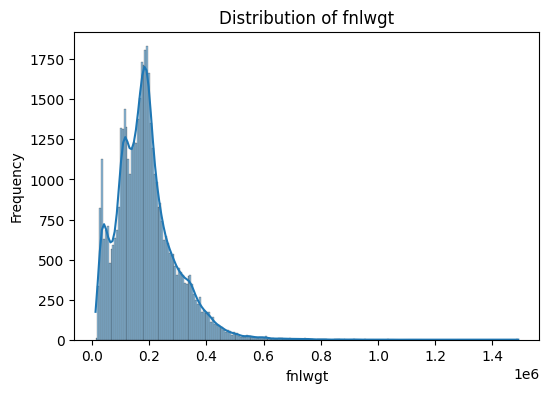

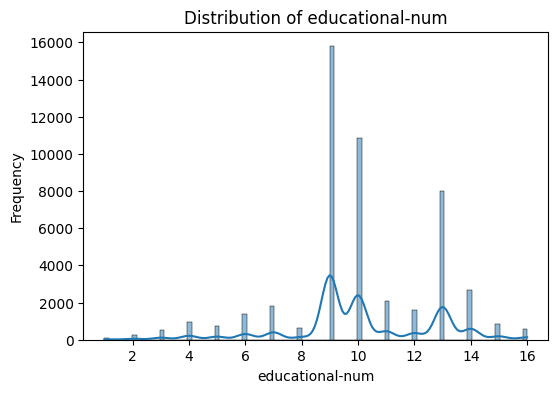

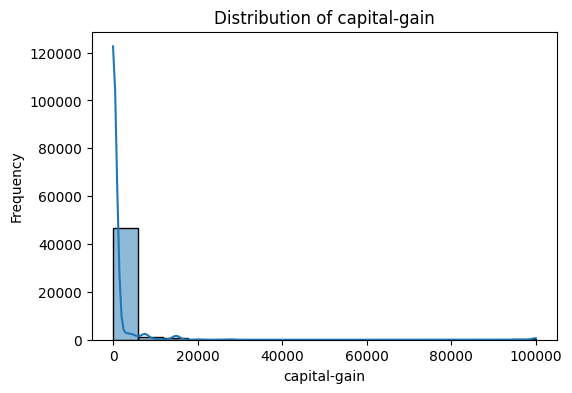

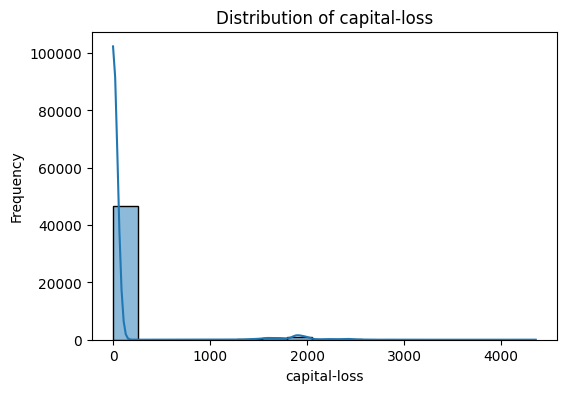

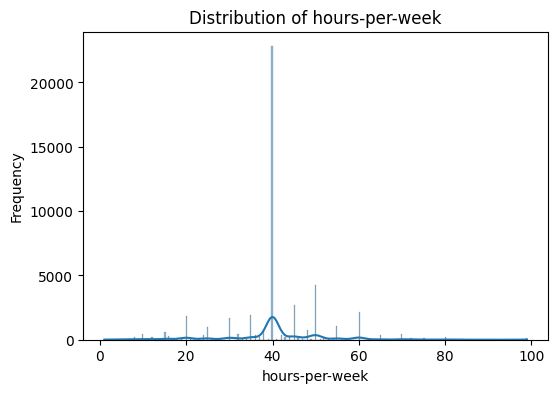

In [28]:
# Distribution of numerical features
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [29]:
# Select a numerical column and a categorical column for visualization
numerical_column = 'age'
categorical_column = 'education'


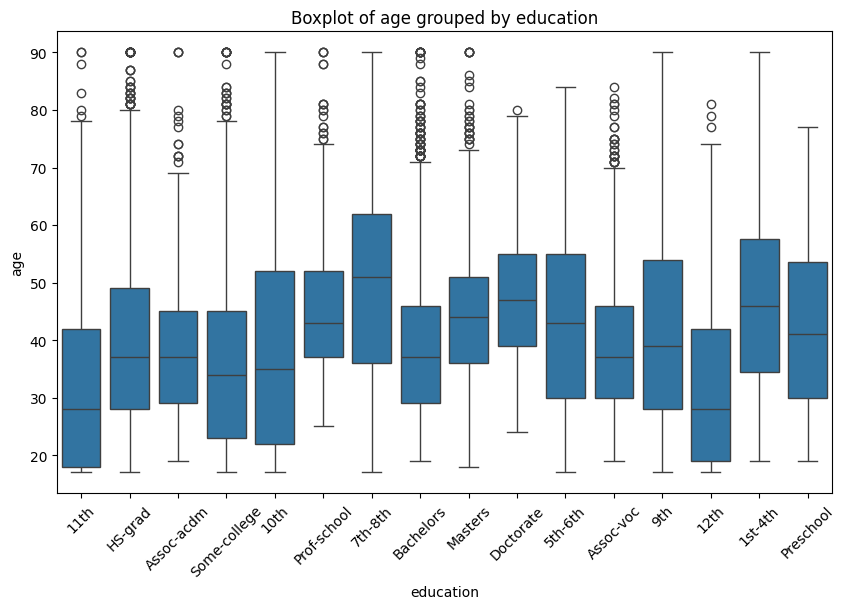

In [30]:
# Creating a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=categorical_column, y=numerical_column, data=df)
plt.title(f'Boxplot of {numerical_column} grouped by {categorical_column}')
plt.xlabel(categorical_column)
plt.ylabel(numerical_column)
plt.xticks(rotation=45)
plt.show()

In [31]:
# Select a numerical column and a categorical column for visualization
numerical_column = 'hours-per-week'
categorical_column = 'marital-status'

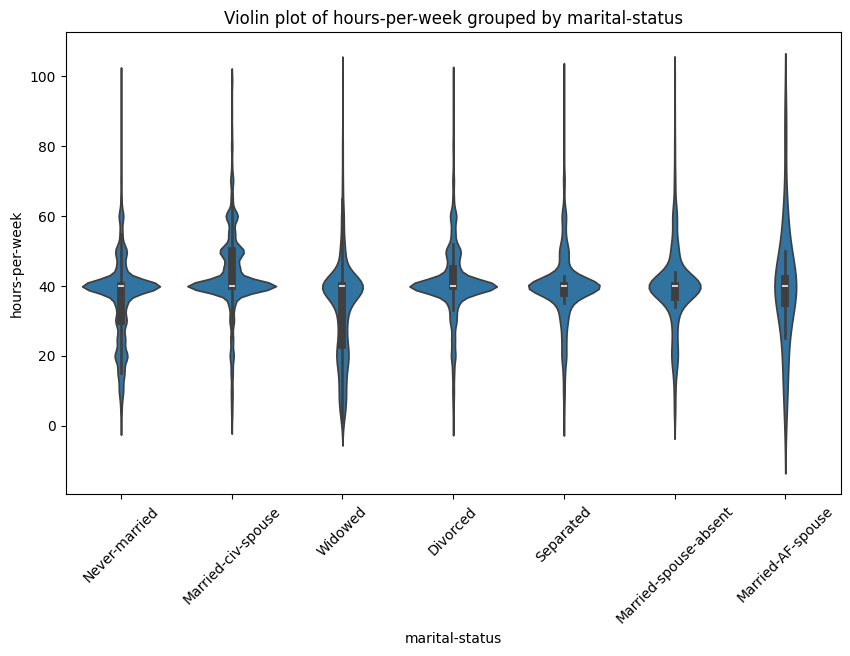

In [32]:
# Creating a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=categorical_column, y=numerical_column, data=df)
plt.title(f'Violin plot of {numerical_column} grouped by {categorical_column}')
plt.xlabel(categorical_column)
plt.ylabel(numerical_column)
plt.xticks(rotation=45)
plt.show()

In [33]:
# Select a numerical column and a categorical column for visualization
numerical_column = 'capital-gain'
categorical_column = 'occupation'


In [34]:
# Calculate the mean of the numerical column grouped by the categorical column
mean_data = X_train.groupby(categorical_column)[numerical_column].mean().reset_index()


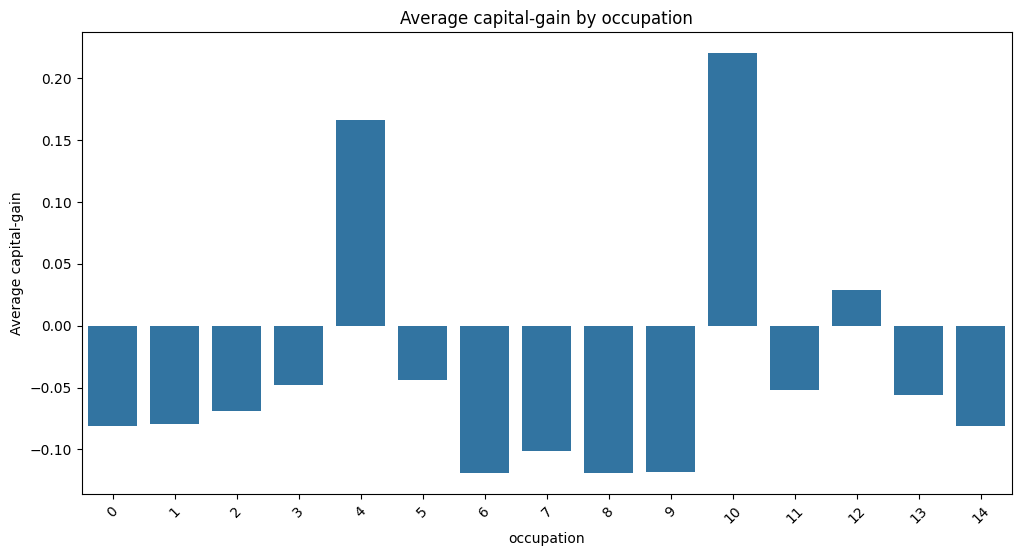

In [35]:
# Creating a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=categorical_column, y=numerical_column, data=mean_data)
plt.title(f'Average {numerical_column} by {categorical_column}')
plt.xlabel(categorical_column)
plt.ylabel(f'Average {numerical_column}')
plt.xticks(rotation=45)
plt.show()

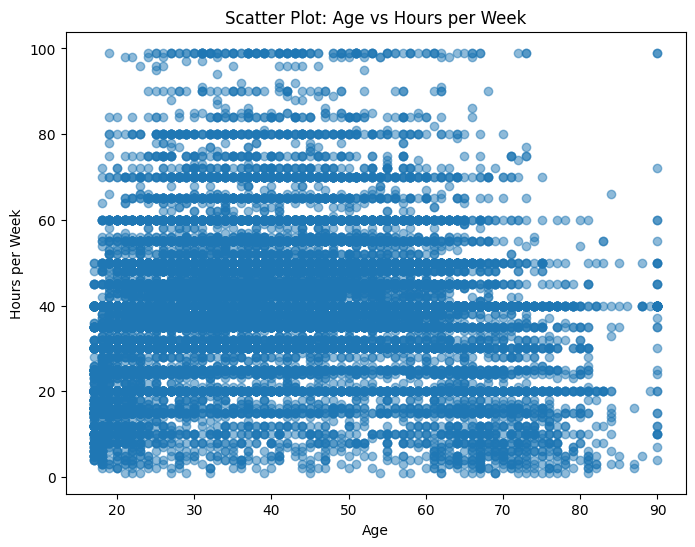

In [36]:
#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['hours-per-week'], alpha=0.5)
plt.title('Scatter Plot: Age vs Hours per Week')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.show()

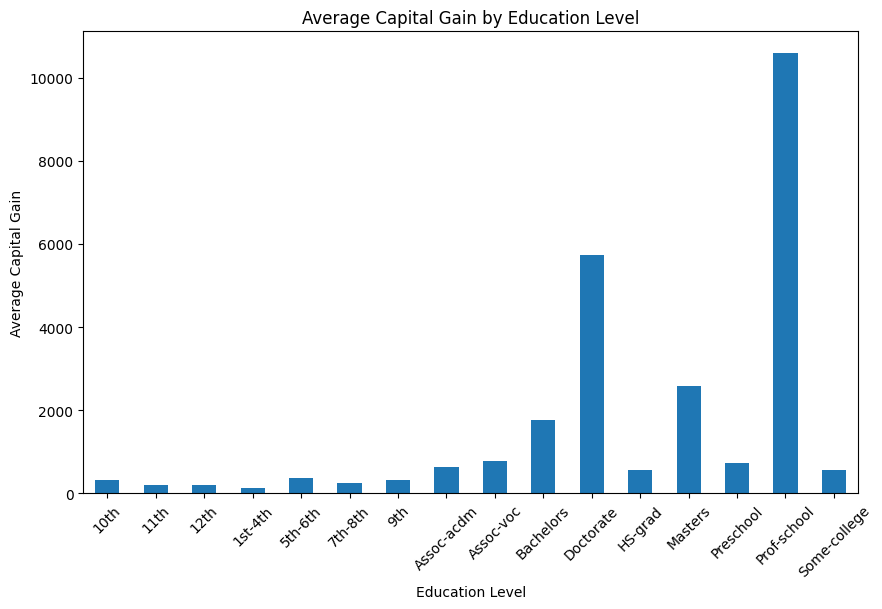

In [37]:
#Bar Plot
# Calculate mean capital-gain for each education level
mean_capital_gain = df.groupby('education')['capital-gain'].mean()

plt.figure(figsize=(10, 6))
mean_capital_gain.plot(kind='bar')
plt.title('Average Capital Gain by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Capital Gain')
plt.xticks(rotation=45)
plt.show()

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier instance
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)


In [39]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier instance
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)


In [40]:
from sklearn.svm import SVC

# Create an SVM Classifier instance
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')


In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Create a K-Nearest Neighbors Classifier instance
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')


In [42]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression instance
logistic_regression = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')


In [43]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier instance
gb_classifier = GradientBoostingClassifier(loss='deviance', n_estimators=100, learning_rate=0.1, max_depth=3)


In [44]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes Classifier instance
nb_classifier = GaussianNB()


In [45]:
from sklearn.neural_network import MLPClassifier

# Create an MLP Classifier instance
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001)


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
# Create instances of different classifiers
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
gb_classifier = GradientBoostingClassifier(loss='deviance', n_estimators=100, learning_rate=0.1, max_depth=3)
ada_classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
logistic_regression = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
ridge_classifier = RidgeClassifier(alpha=1.0, solver='auto')
nb_classifier = GaussianNB()
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001)


In [47]:
# Create instances of different classifiers
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)
gb_classifier = GradientBoostingClassifier(loss='deviance', n_estimators=100, learning_rate=0.1, max_depth=3)
ada_classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
logistic_regression = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
ridge_classifier = RidgeClassifier(alpha=1.0, solver='auto')
nb_classifier = GaussianNB()
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001)


In [48]:
# Create a list of classifiers and their names
classifiers = [
    ("Decision Tree Classifier", dt_classifier),
    ("Random Forest Classifier", rf_classifier),
    ("Gradient Boosting Classifier", gb_classifier),
    ("AdaBoost Classifier", ada_classifier),
    ("Logistic Regression", logistic_regression),
    ("Ridge Classifier", ridge_classifier),
    ("Naive Bayes Classifier", nb_classifier),
    ("K-Nearest Neighbors Classifier", knn_classifier),
    ("SVM Classifier", svm_classifier)
   
]

In [49]:
# Print the models along with their hyperparameters
for name, model in classifiers:
    print(f"Model: {name}")
    print(f"Hyperparameters: {model.get_params()}\n")

Model: Decision Tree Classifier
Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Model: Random Forest Classifier
Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Model: Gradient Boosting Classifier
Hyperparameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impu

In [50]:
# Prepare data for plotting
model_names = [name for name, _ in classifiers]
hyperparameters = [model.get_params() for _, model in classifiers]
param_counts = [len(params) for params in hyperparameters]

Text(0.5, 1.0, 'Number of Hyperparameters in Different Models')

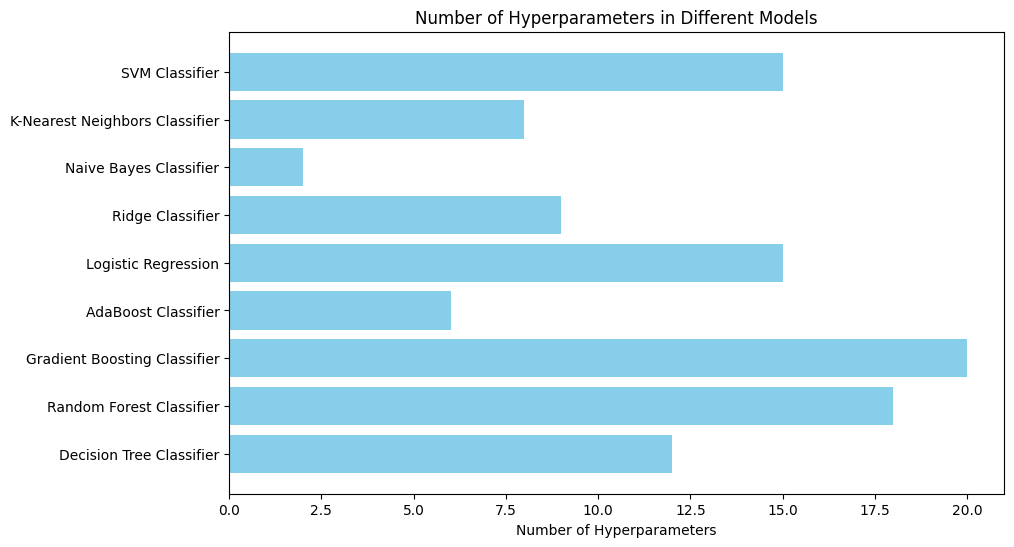

In [51]:
# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(model_names, param_counts, color='skyblue')
plt.xlabel('Number of Hyperparameters')
plt.title('Number of Hyperparameters in Different Models')


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate  # You may need to install the 'tabulate' library
from sklearn.compose import ColumnTransformer


In [53]:
# Separate features and target variable
target_column = 'income'
features = data.drop(target_column, axis=1)
target = data[target_column]

In [54]:
# Convert target variable to numeric values
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)  # Encode non-numeric labels to numeric labels


In [55]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [56]:
# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include='number').columns
categorical_cols = X_train.select_dtypes(exclude='number').columns


In [57]:
# Preprocessing for numerical features
numeric_transformer = Pipeline(steps=[
    ('num', 'passthrough')
])


In [58]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [59]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [60]:
# Initialize regression models
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    
]

In [61]:
# Define lists to store evaluation results
model_names = []
mae_scores = []
mse_scores = []
r2_scores = []

In [62]:
# Iterate through models and evaluate each one
for model in models:
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    model_pipeline.fit(X_train, y_train)
    model_names.append(type(model).__name__)  # Get the model's name
    
    # Make predictions on test data
    y_pred = model_pipeline.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append scores to respective lists
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)


In [63]:
# Create a summary table for evaluation results
evaluation_results = {
    'Model': model_names,
    'Mean Absolute Error': mae_scores,
    'Mean Squared Error': mse_scores,
    'R-squared (R²)': r2_scores
}

# Display the results as a table using the tabulate library
print(tabulate(evaluation_results, headers='keys', tablefmt='pretty'))

+-----------------------+---------------------+---------------------+-----------------------+
|         Model         | Mean Absolute Error | Mean Squared Error  |    R-squared (R²)     |
+-----------------------+---------------------+---------------------+-----------------------+
|   LinearRegression    | 0.2924681794424193  | 0.13305238395620617 |  0.2586148820771972   |
| DecisionTreeRegressor | 0.18092947077490018 | 0.1809038796192036  | -0.008019850048841315 |
| RandomForestRegressor | 0.18705884259733171 | 0.0980179414900877  |  0.45383133357386607  |
+-----------------------+---------------------+---------------------+-----------------------+


# Pipeline for project

In [64]:


# Separate features and target variable
X = data.drop(columns=['income'])
y = data['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include='number').columns
categorical_cols = X.select_dtypes(exclude='number').columns

# Preprocessing for numerical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

#Step 2: Model Selection and Training

# Define models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(max_iter=1000))
]

# Create an empty list to store model results
results = []

# Iterate through models and train them
for model_name, model in models:
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Train the model
    model_pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store model results
    results.append({'Model': model_name, 'Accuracy': accuracy})

# Display model results
for result in results:
    print(result)


{'Model': 'Random Forest', 'Accuracy': 0.8643668748080663}
{'Model': 'Logistic Regression', 'Accuracy': 0.8272085167366158}


In [66]:
#Step 3: Hyperparameter Tuning using GridSearchCV

# Define models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(max_iter=1000))
]

# Create an empty list to store model results
results = []

for model_name, model in models:
    if model_name == 'Random Forest':
        # Hyperparameters grid for Random Forest
        param_grid = {
            'model__n_estimators': [100, 200, 300],
            'model__max_depth': [None, 10, 20],
            'model__min_samples_split': [2, 5, 10]
        }
    else:  # For Logistic Regression
        # Hyperparameters grid for Logistic Regression
        param_grid = {
            'model__C': [0.1, 1, 10],
            'model__solver': ['liblinear', 'lbfgs'],
            'model__penalty': ['l1', 'l2']
        }

    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_

    results.append({'Model': model_name, 'Best Model': best_model, 'Best Params': best_params, 'Best Accuracy': best_accuracy})

# Display model results
for result in results:
    print(result)


A:\Python\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "A:\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\Python\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "A:\Python\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "A:\Python\Lib\site-p

{'Model': 'Random Forest', 'Best Model': Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=20, min_sam

In [67]:
#Step 4: Evaluate the Best Model on Test Data
# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.8274132459821886


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from tabulate import tabulate  # Ensure you have the 'tabulate' library installed

# Assuming 'income' is the target variable
X = data.drop("income", axis=1)
y = data["income"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers with hyperparameters
classifiers = [
    ("Logistic Regression", LogisticRegression(), {'model__C': [0.1, 1, 10], 'model__solver': ['lbfgs'], 'model__penalty': ['l2']}),
    ("Random Forest", RandomForestClassifier(), {'model__n_estimators': [50, 100, 200], 'model__max_depth': [None, 10, 20], 'model__min_samples_split': [2, 5, 10]}),
    ("Gradient Boosting", GradientBoostingClassifier(), {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.01, 0.1, 0.2], 'model__max_depth': [3, 5, 7]}),
    ("Decision Tree", DecisionTreeClassifier(), {'model__max_depth': [None, 10, 20], 'model__min_samples_split': [2, 5, 10], 'model__min_samples_leaf': [1, 2, 4]}),
    ("SVM", SVC(), {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf'], 'model__gamma': ['scale', 'auto']}),
    ("k-Nearest Neighbors", KNeighborsClassifier(), {'model__n_neighbors': [3, 5, 7], 'model__weights': ['uniform', 'distance'], 'model__algorithm': ['auto', 'ball_tree', 'kd_tree']})
]

# Create an empty list to store model results
results = []

# Train, tune hyperparameters, and evaluate each classifier
for name, model, param_grid in classifiers:
    # Create pipeline
    model_pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Best model with tuned hyperparameters
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store model results
    results.append({'Model': name, 'Best Model': best_model, 'Best Params': grid_search.best_params_, 'Test Accuracy': accuracy})

# Display model results
for result in results:
    print(f"\n{20 * '='}\n{result['Model']}\n{20 * '='}")
    print(f"Best Parameters: {result['Best Params']}")
    print(f"Test Accuracy: {result['Test Accuracy']:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, result['Best Model'].predict(X_test)))


SyntaxError: closing parenthesis ')' does not match opening parenthesis '{' (4214218886.py, line 27)

# Model 1:  Logistic Regression

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

# Assuming 'income' is the target variable
X = data.drop("income", axis=1)
y = data["income"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logistic_params = {'model__C': [0.1, 1, 10], 'model__solver': ['lbfgs'], 'model__penalty': ['l2']}
logistic_model = LogisticRegression()

# Create pipeline
logistic_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', logistic_model)
])

# Hyperparameter tuning using GridSearchCV
logistic_grid_search = GridSearchCV(logistic_pipeline, logistic_params, cv=5, scoring='accuracy')
logistic_grid_search.fit(X_train, y_train)

# Best model with tuned hyperparameters
best_logistic_model = logistic_grid_search.best_estimator_

# Make predictions on the test set
logistic_y_pred = best_logistic_model.predict(X_test)

# Evaluate accuracy
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)

# Display results
print(f"\n{'=' * 20}\nLogistic Regression\n{'=' * 20}")
print(f"Best Parameters: {logistic_grid_search.best_params_}")
print(f"Test Accuracy: {logistic_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, best_logistic_model.predict(X_test)))



Logistic Regression
Best Parameters: {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Test Accuracy: 0.8276
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7479
           1       0.71      0.45      0.55      2290

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.82      0.83      0.81      9769



# Model 2: Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_params = {'model__n_estimators': [50, 100, 200], 'model__max_depth': [None, 10, 20], 'model__min_samples_split': [2, 5, 10]}
rf_model = RandomForestClassifier()

# Create pipeline
rf_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', rf_model)
])

# Hyperparameter tuning using GridSearchCV
rf_grid_search = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

# Best model with tuned hyperparameters
best_rf_model = rf_grid_search.best_estimator_

# Make predictions on the test set
rf_y_pred = best_rf_model.predict(X_test)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)

# Display results
print(f"\n{'=' * 20}\nRandom Forest\n{'=' * 20}")
print(f"Best Parameters: {rf_grid_search.best_params_}")
print(f"Test Accuracy: {rf_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, best_rf_model.predict(X_test)))



Random Forest
Best Parameters: {'model__max_depth': 20, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Test Accuracy: 0.8720
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7479
           1       0.78      0.63      0.70      2290

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769



# Model 3: GradientBoosting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb_params = {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.01, 0.1, 0.2], 'model__max_depth': [3, 5, 7]}
gb_model = GradientBoostingClassifier()

# Create pipeline
gb_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', gb_model)
])

# Hyperparameter tuning using GridSearchCV
gb_grid_search = GridSearchCV(gb_pipeline, gb_params, cv=5, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)

# Best model with tuned hyperparameters
best_gb_model = gb_grid_search.best_estimator_

# Make predictions on the test set
gb_y_pred = best_gb_model.predict(X_test)

# Evaluate accuracy
gb_accuracy = accuracy_score(y_test, gb_y_pred)

# Display results
print(f"\n{'=' * 20}\nGradient Boosting\n{'=' * 20}")
print(f"Best Parameters: {gb_grid_search.best_params_}")
print(f"Test Accuracy: {gb_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, best_gb_model.predict(X_test)))



Gradient Boosting
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}
Test Accuracy: 0.8795
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7479
           1       0.78      0.67      0.72      2290

    accuracy                           0.88      9769
   macro avg       0.84      0.81      0.82      9769
weighted avg       0.88      0.88      0.88      9769



# Model 4: Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt_params = {'model__max_depth': [None, 10, 20], 'model__min_samples_split': [2, 5, 10], 'model__min_samples_leaf': [1, 2, 4]}
dt_model = DecisionTreeClassifier()

# Create pipeline
dt_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', dt_model)
])

# Hyperparameter tuning using GridSearchCV
dt_grid_search = GridSearchCV(dt_pipeline, dt_params, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)

# Best model with tuned hyperparameters
best_dt_model = dt_grid_search.best_estimator_

# Make predictions on the test set
dt_y_pred = best_dt_model.predict(X_test)

# Evaluate accuracy
dt_accuracy = accuracy_score(y_test, dt_y_pred)

# Display results
print(f"\n{'=' * 20}\nDecision Tree\n{'=' * 20}")
print(f"Best Parameters: {dt_grid_search.best_params_}")
print(f"Test Accuracy: {dt_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, best_dt_model.predict(X_test)))



Decision Tree
Best Parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 10}
Test Accuracy: 0.8621
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      7479
           1       0.73      0.65      0.69      2290

    accuracy                           0.86      9769
   macro avg       0.81      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769



# Model 5: Support Vector Machine (SVM)

In [78]:
from sklearn.svm import SVC

# SVM
svm_params = {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf'], 'model__gamma': ['scale', 'auto']}
svm_model = SVC()

# Create pipeline
svm_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', svm_model)
])

# Hyperparameter tuning using GridSearchCV
svm_grid_search = GridSearchCV(svm_pipeline, svm_params, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)

# Best model with tuned hyperparameters
best_svm_model = svm_grid_search.best_estimator_

# Make predictions on the test set
svm_y_pred = best_svm_model.predict(X_test)

# Evaluate accuracy
svm_accuracy = accuracy_score(y_test, svm_y_pred)

# Display results
print(f"\n{'=' * 20}\nSupport Vector Machine (SVM)\n{'=' * 20}")
print(f"Best Parameters: {svm_grid_search.best_params_}")
print(f"Test Accuracy: {svm_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, best_svm_model.predict(X_test)))



Support Vector Machine (SVM)
Best Parameters: {'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Test Accuracy: 0.8555
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7479
           1       0.76      0.57      0.65      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.76      0.78      9769
weighted avg       0.85      0.86      0.85      9769



# Model 6: k-Nearest Neighbors (kNN)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

# k-Nearest Neighbors
knn_params = {'model__n_neighbors': [3, 5, 7], 'model__weights': ['uniform', 'distance'], 'model__algorithm': ['auto', 'ball_tree', 'kd_tree']}
knn_model = KNeighborsClassifier()

# Create pipeline
knn_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', knn_model)
])

# Hyperparameter tuning using GridSearchCV
knn_grid_search = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)

# Best model with tuned hyperparameters
best_knn_model = knn_grid_search.best_estimator_

# Make predictions on the test set
knn_y_pred = best_knn_model.predict(X_test)

# Evaluate accuracy
knn_accuracy = accuracy_score(y_test, knn_y_pred)

# Display results
print(f"\n{'=' * 20}\nk-Nearest Neighbors (kNN)\n{'=' * 20}")
print(f"Best Parameters: {knn_grid_search.best_params_}")
print(f"Test Accuracy: {knn_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, best_knn_model.predict(X_test)))



k-Nearest Neighbors (kNN)
Best Parameters: {'model__algorithm': 'auto', 'model__n_neighbors': 7, 'model__weights': 'uniform'}
Test Accuracy: 0.8407
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      7479
           1       0.68      0.61      0.64      2290

    accuracy                           0.84      9769
   macro avg       0.78      0.76      0.77      9769
weighted avg       0.84      0.84      0.84      9769



In [80]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [94]:
input_data = pd.DataFrame({
    'age': [25],
    'workclass': [4],
    'fnlwgt': [226802],
    'education': [1],
    'educational-num': [7],
    'marital-status': [4],
    'occupation': [7],
    'relationship': [3],
    'race': [2],
    'gender': [1],
    'capital-gain': [0],
    'capital-loss': [0],
    'hours-per-week': [40],
    'native-country': [39]
})

# Iterate through each trained model and make predictions
for result in results:
    model = result['Best Model']

    # Transform the input data using the scaler if it exists in the pipeline
    if 'scaler' in model.named_steps:
        input_data_transformed = model['scaler'].transform(input_data)
    else:
        input_data_transformed = input_data

    # Make predictions for the input data
    predictions = model.predict(input_data_transformed)

    # Display predictions
    print(f"\n{20 * '='}\n{result['Model']} Prediction\n{20 * '='}")
    print("Income Predictions:")
    print(predictions)


Random Forest Prediction
Income Predictions:
[0]

Logistic Regression Prediction
Income Predictions:
[0]
